In [5]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

Annual Volatility: 0.4428139045746556


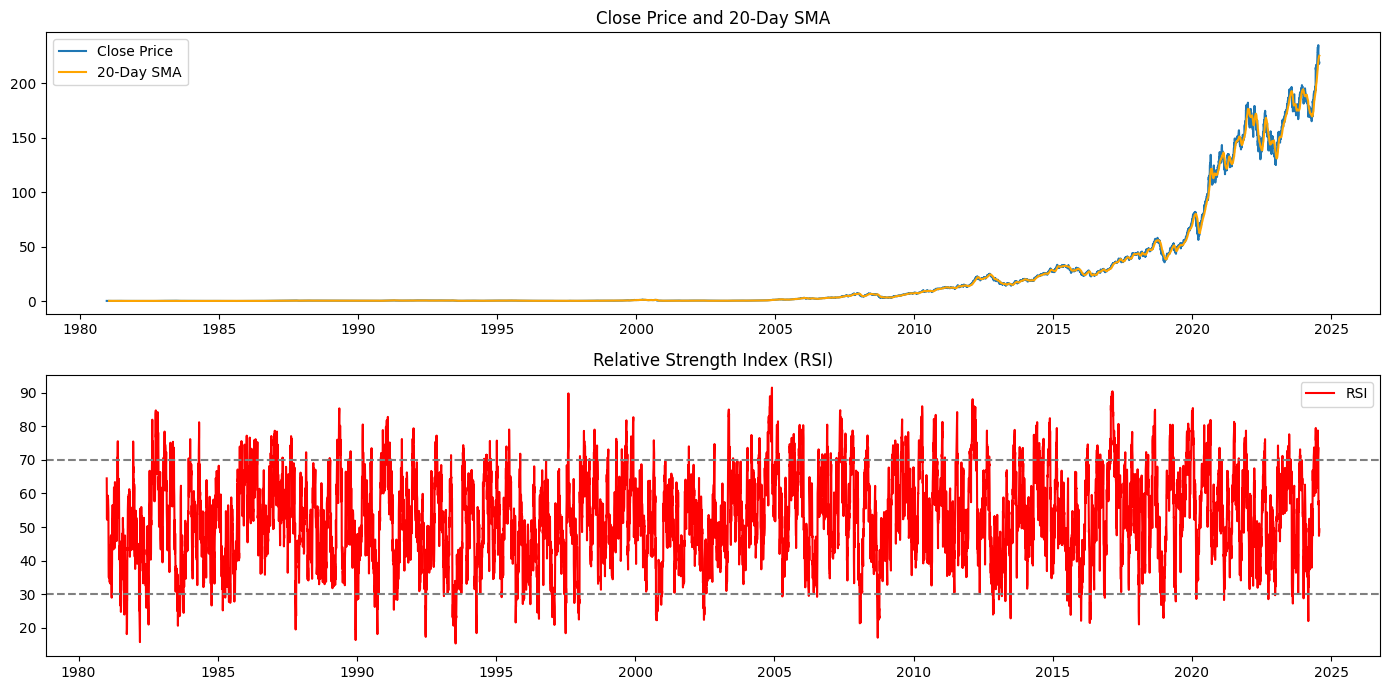

In [6]:
# Load stock price data
df = pd.read_csv('../Data/AAPL_historical_data.csv')

# Ensure data includes required columns
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Apply TA-Lib indicators
df['SMA'] = talib.SMA(df['Close'], timeperiod=20)  # Simple Moving Average
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)  # Relative Strength Index
df['MACD'], df['MACDSignal'], df['MACDHist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)  # MACD

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate annual volatility
annual_volatility = df['Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year
print(f"Annual Volatility: {annual_volatility}")

# Visualize data
plt.figure(figsize=(14, 7))

# Plot Close price and SMA
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA'], label='20-Day SMA', color='orange')
plt.title('Close Price and 20-Day SMA')
plt.legend()

# Plot RSI
plt.subplot(2, 1, 2)
plt.plot(df['RSI'], label='RSI', color='red')
plt.axhline(70, linestyle='--', color='gray')
plt.axhline(30, linestyle='--', color='gray')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Load your data
df2 = pd.read_csv('../Data/AAPL_historical_data.csv')

# Check the column names
print(df2.columns)

# If you see a different name, use that or rename it
# For example, if the date column is named 'date' or has extra spaces
df2.rename(columns={'date': 'Date'}, inplace=True)  # Adjust this if necessary

# Convert to datetime if 'Date' is the correct name
df2['Date'] = pd.to_datetime(df2['Date'])

# Set the date as the index
df2.set_index('Date', inplace=True)

# Now you can proceed with further analysis


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [9]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load stock prce data

df2['Date'] = pd.to_datetime(df2['date'])
df2.set_index('Date', inplace=True)

# Load analyst ratings data
# df = pd.read_csv('raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Merge the two datasets on the date
merged_data = pd.merge(df2, df, left_index=True, right_index=True, how='inner')

# Now you can perform your analysis
# Example: Calculate daily returns and analyze sentiment impact
merged_data['Return'] = merged_data['Close'].pct_change()

# Apply sentiment analysis on headlines (assuming sentiment is calculated separately)
# Here, we'll just add a placeholder for sentiment (e.g., -1 for negative, 0 for neutral, 1 for positive)
merged_data['Sentiment'] = np.random.choice([-1, 0, 1], size=len(merged_data))  # Placeholder for sentiment analysis

# Analyze the impact of sentiment on stock returns
positive_sentiment = merged_data[merged_data['Sentiment'] == 1]['Return'].mean()
negative_sentiment = merged_data[merged_data['Sentiment'] == -1]['Return'].mean()

print(f"Average return on positive sentiment: {positive_sentiment}")
print(f"Average return on negative sentiment: {negative_sentiment}")

# Visualize the data
plt.figure(figsize=(14, 7))

# Plot stock price and highlight based on sentiment
plt.plot(merged_data['Close'], label='Close Price')
plt.scatter(merged_data.index, merged_data['Close'], c=merged_data['Sentiment'], cmap='RdYlGn', label='Sentiment')

plt.title('Stock Price with Sentiment Analysis')
plt.legend()
plt.show()
